# Hey sweetheart!
## Let's segment some Stuff!


#### For a smooth ride, use a kernel from a nice clean virtualenv with (the right) TF and other dependencies installed: 

Follow [THIS](http://anbasile.github.io/programming/2017/06/25/jupyter-venv/) and [THIS](https://www.tensorflow.org/install/install_linux), 
or try the following recipe, after editing ```requirements``` to have the right version of tensorflow[-gpu] ,   <br>corresponding to your HW & CUDA setup (yep, it's not cross-compatible. Sad.)
```
    mkdir ~/envs && mkdir ~/envs/fresh4seg
    virtualenv ~/envs/fresh4seg -p python2  # w.o. --system-packages. let's have it clean
    source ~/envs/fresh4seg/bin/activate
    which pip                      # verify it's the venvs' (not system) pip
    pip install -r requirements
    which ipython                  # verify it's the venvs' (not system) ipython
    ipython kernel install --user --name=fresh4seg
    deactivate
```
Run the system (not venv) ***jupyter notebook [flags]***, then in notebook Kernel-> Change kernel -> fresh4seg

In [1]:
import tensorflow as tf
print tf.__version__

1.3.0


#### Download a pre-trained model

In [3]:
!mkdir tmp
!cd tmp
!wget https://github.com/hailotech/seg-mentor/releases/download/v0.5/inception_v1_fcn16.tgz
!tar -xzvf inception_v1_fcn16.tgz
!cd ..

mkdir: cannot create directory ‘tmp’: File exists
--2018-05-02 16:18:06--  https://github.com/hailotech/seg-mentor/releases/download/v0.5/inception_v1_fcn16.tgz
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2018-05-02 16:18:06 ERROR 404: Not Found.

tmp/Apr24_inception_v1__1/fcn.ckpt.data-00000-of-00001
tmp/Apr24_inception_v1__1/fcn.ckpt.index
tmp/Apr24_inception_v1__1/fcn.ckpt.meta
tmp/Apr24_inception_v1__1/runargs


#### Download some media

In [ ]:
!wget https://github.com/hailotech/seg-mentor/releases/download/v0.5/perfectparking.mp4    

In [14]:
%%HTML
<div align="middle">
<video width="80%" controls>
      <source src="perfectparking.mp4" type="video/mp4">
</video></div>

#### Now let's prepare and run the model:

In [10]:
from fcn_test import *
import json 

traindir = 'tmp/Apr24_inception_v1__1/'
checkpoint = traindir+'fcn.ckpt' 
pixels = 512
cfg = json.load(open(traindir+'/runargs'))

fcn_builder = fcn_arch.FcnArch(number_of_classes=number_of_classes, is_training=False, net=cfg['basenet'],
                               trainable_upsampling=cfg['trainable_upsampling'], fcn16=cfg['fcn16'])

def fcnfunc_img2labels(img):
    tmp = tf.argmax(fcn_builder.build_net(img), dimension=3)
    return tf.expand_dims(tmp, 3)

In [6]:
tf.reset_default_graph()
segment_movie(fcnfunc_img2labels, checkpoint, 'perfectparking.mp4', pixels)

Instructions for updating:
Use the `axis` argument instead
INFO:tensorflow:Restoring parameters from tmp/Apr24_inception_v1__1/fcn.ckpt
[MoviePy] >>>> Building video perfectparking_segmented.mp4
[MoviePy] Writing video perfectparking_segmented.mp4


100%|██████████| 43/43 [00:02<00:00, 20.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: perfectparking_segmented.mp4 



This should give you a gist of how the code's high level part works. You'll have to dive into the files for further details, I guess...
#### Side note: same functionality available from command line as:
``` source ~/envs/fresh4seg/bin/activate
python fcn_test.py --traindir=tmp/Apr24_inception_v1__1 --movie=perfectparking.mp4
```

#### OK let's see what we got:

In [7]:
%%HTML
<div align="middle">
<video width="80%" controls>
      <source src="perfectparking_segmented.mp4" type="video/mp4">
</video></div>

Well, you all probably want a smart API then movie.mp4 -> movie_segmented.mp4..
<br> I guess you'll need to dive a bit into the code for that. As russian proverb goes, "without work you can't even get a small fish out of the pond"

#### Let's segment a single image now, with legends and stuff:

In [7]:
!wget https://c1.staticflickr.com/9/8525/8609166764_6ab4366126_b.jpg -O turkeycar.jpg

--2018-05-07 10:37:52--  https://c1.staticflickr.com/9/8525/8609166764_6ab4366126_b.jpg
Resolving c1.staticflickr.com (c1.staticflickr.com)... 87.248.116.11, 87.248.114.12, 87.248.116.12, ...
Connecting to c1.staticflickr.com (c1.staticflickr.com)|87.248.116.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 355013 (347K) [image/jpeg]
Saving to: ‘turkeycar.jpg’

100%[======================================>] 355,013     1.34MB/s   in 0.3s   

2018-05-07 10:37:53 (1.34 MB/s) - ‘turkeycar.jpg’ saved [355013/355013]



Instructions for updating:
Use the `axis` argument instead
INFO:tensorflow:Restoring parameters from tmp/Apr24_inception_v1__1/fcn.ckpt


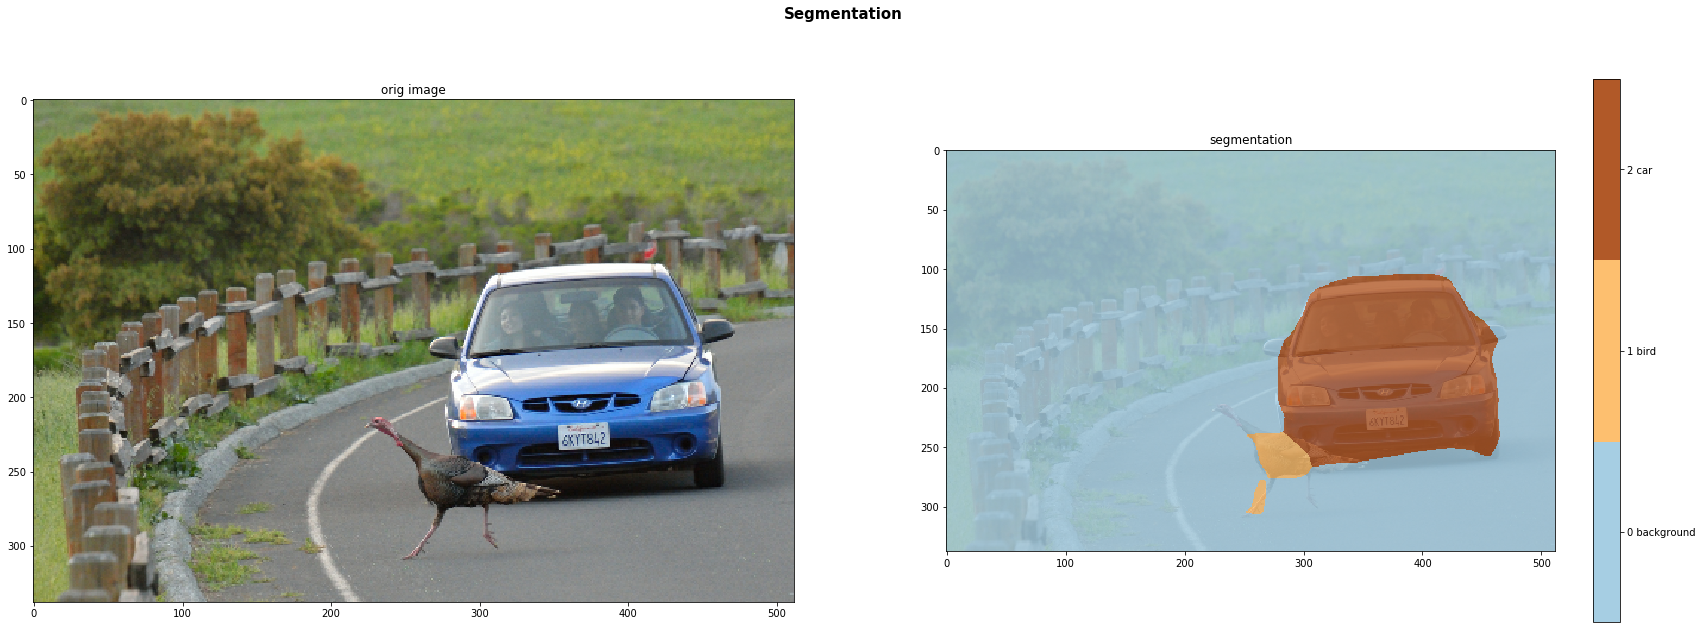

In [11]:
from fcn_test import *
%matplotlib inline

tf.reset_default_graph()
segment_image(fcnfunc_img2labels, checkpoint, 'turkeycar.jpg', pixels)

In [13]:
# TODO!